## Data Preprocessing


In [61]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [62]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [63]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [68]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [69]:

import matplotlib.pyplot as plt
%matplotlib inline

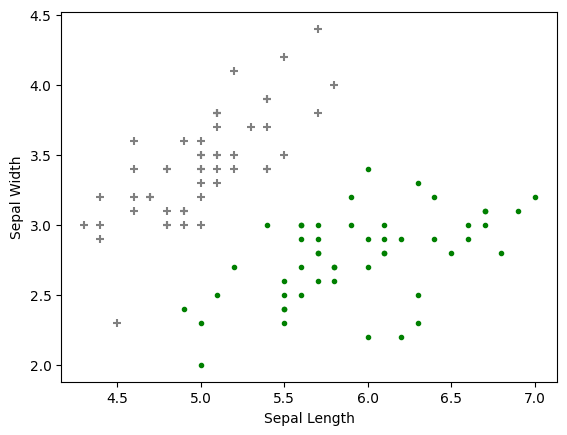

In [70]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="gray",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="green",marker='.')

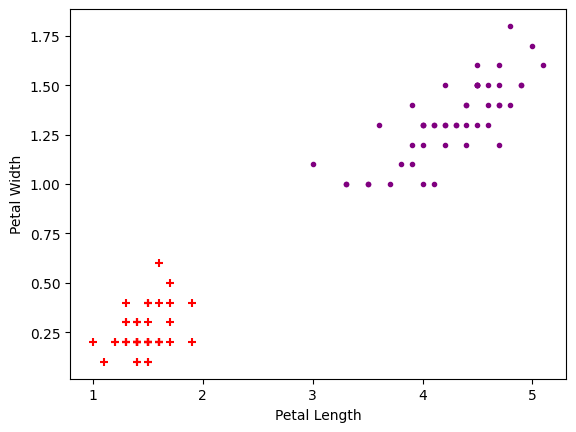

In [71]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="purple",marker='.')

In [72]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

## Model Train

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [86]:
model.score(X_test,y_test)

0.9666666666666667

In [87]:
from sklearn.metrics import confusion_matrix
y_pre = model.predict(X_test)
cmm = confusion_matrix(y_test, y_pre)
cmm

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  7]])

Text(58.222222222222214, 0.5, 'Truth')

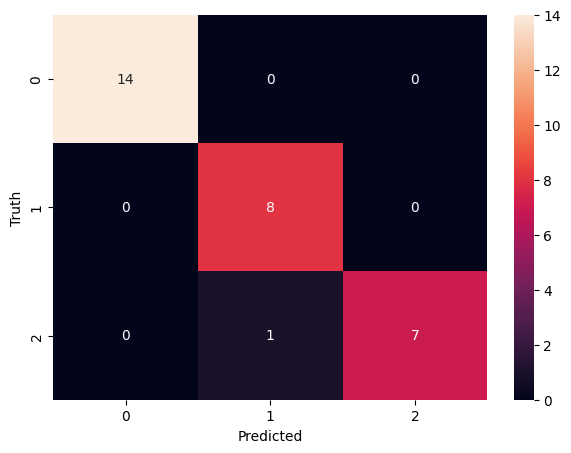

In [88]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(7,5))
sns.heatmap(cmm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

